In [1]:
# Setup paths and parameters
fdata = 'results/results.pkl'
rpath = 'figures/'
font_size = 24
options = 'gL'
yrange = [0, 6.5]
nr_traces_vec = list(range(1, 11)) + list(range(20, 101, 10)) + [200, 500, 1000]
len_na_vec = len(nr_traces_vec)

In [2]:
import pickle

# Load template results and related data
with open(fdata, 'rb') as f:
    data = pickle.load(f)

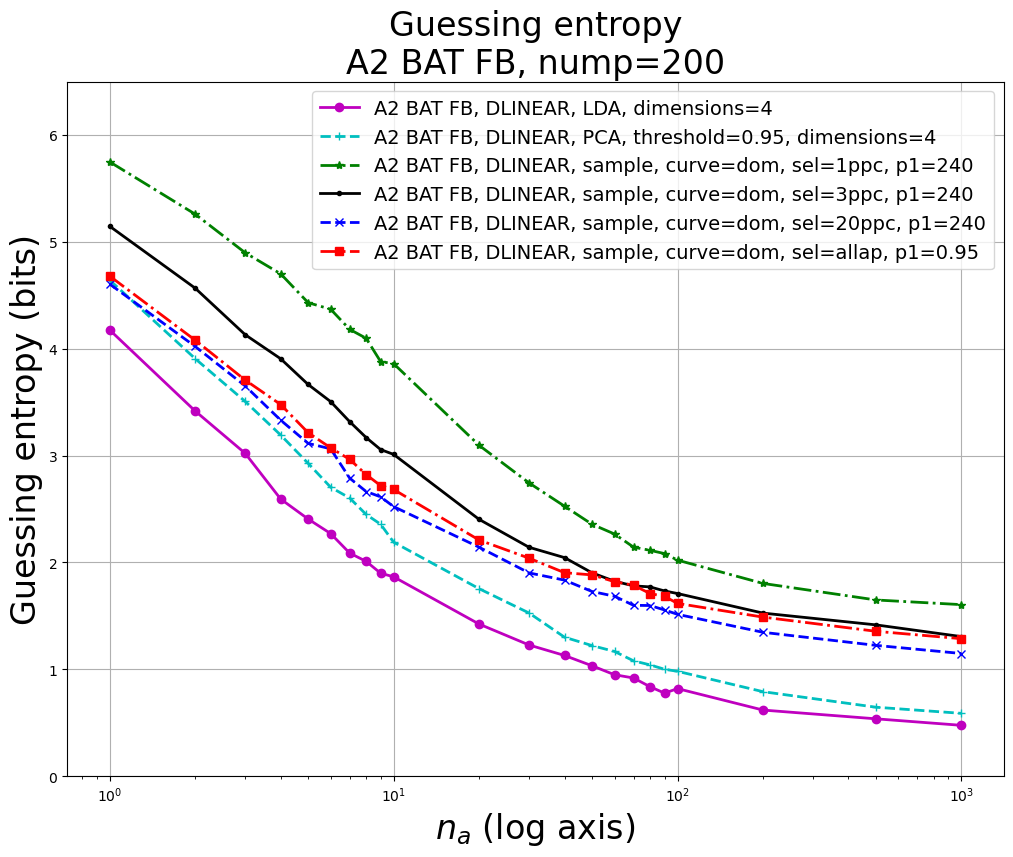

In [3]:
from do_show_results_templates_a2_bat_fb import get_ge_from_success_info, get_line_properties_templates, make_figures_ge
import matplotlib.pyplot as plt
import numpy as np

# Reset environment
plt.close('all')

nump = data[0]['x_profile'].shape[0]
rand_iter = data[0]['rand_iter']
nr_exp_ab = len(data)
L = [None] * nr_exp_ab
G = np.zeros((nr_exp_ab, len_na_vec))
slines_ab = [None] * nr_exp_ab
style = 'fancy'

for k in range(nr_exp_ab):
    cmethod = data[k]['cmethod']
    if cmethod == 'sample':
        L[k] = f"A2 BAT FB, DLINEAR, {cmethod}, curve={data[k]['cparams']['curve']}, sel={data[k]['cparams']['sel']}, p1={data[k]['cparams']['p1']}"
    elif cmethod == 'PCA':
        L[k] = f"A2 BAT FB, DLINEAR, {cmethod}, threshold={data[k]['cparams']['pca_threshold']}, dimensions={data[k]['cparams']['pca_dimensions']}"
    elif cmethod == 'LDA':
        L[k] = f"A2 BAT FB, DLINEAR, {cmethod}, dimensions={data[k]['cparams']['lda_dimensions']}"

    g = get_ge_from_success_info(data[k]['success_info'], nr_traces_vec)
    G[k, :] = g['joint']
    slines_ab[k] = get_line_properties_templates(k, style)

# Plot results
title_results = f"A2 BAT FB, nump={nump}"
rprefix = f"a2_bat_fb_dlinear_n{nump}r_ls_r{rand_iter}_"
make_figures_ge(G, nr_traces_vec, rpath, rprefix, title_results, L, font_size, slines_ab, options, yrange)
